In [2]:
import pandas_datareader.data as web
import datetime
from pprint import pprint

In [3]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url, header=0)
len(sp)

2

In [4]:
sp[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
Ticker symbol             505 non-null object
Security                  505 non-null object
SEC filings               505 non-null object
GICS Sector               505 non-null object
GICS Sub Industry         505 non-null object
Location                  505 non-null object
Date first added[3][4]    398 non-null object
CIK                       505 non-null int64
Founded                   139 non-null object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [10]:
sp[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
Unnamed: 0    188 non-null object
Added         186 non-null object
Removed       184 non-null object
Unnamed: 3    181 non-null object
Unnamed: 4    159 non-null object
Unnamed: 5    161 non-null object
dtypes: object(6)
memory usage: 8.9+ KB


### Google Finance

In [ ]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
f = web.DataReader('F', 'google', start, end)

### Morningstar

In [8]:
import pandas_datareader.data as web

from datetime import datetime

start = '2014'
end = datetime.today() # default

ms = web.DataReader('FB', 'morningstar', start=start, end=end)
ms.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1161 entries, (FB, 2014-01-01 00:00:00) to (FB, 2018-06-13 00:00:00)
Data columns (total 5 columns):
Close     1161 non-null float64
High      1161 non-null float64
Low       1161 non-null float64
Open      1161 non-null float64
Volume    1161 non-null int64
dtypes: float64(4), int64(1)
memory usage: 57.9+ KB


In [9]:
web.DataReader(['FB', 'AAPL'], 'morningstar', start).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2322 entries, (FB, 2014-01-01 00:00:00) to (AAPL, 2018-06-13 00:00:00)
Data columns (total 5 columns):
Close     2322 non-null float64
High      2322 non-null float64
Low       2322 non-null float64
Open      2322 non-null float64
Volume    2322 non-null int64
dtypes: float64(4), int64(1)
memory usage: 106.7+ KB


### IEX

In [11]:
import pandas_datareader.data as web

from datetime import datetime

# start = datetime(2015, 2, 9)
# end = datetime(2017, 5, 24)

iex = web.DataReader('FB', 'iex', start)
iex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 2015-02-09 to 2018-06-13
Data columns (total 5 columns):
open      843 non-null float64
high      843 non-null float64
low       843 non-null float64
close     843 non-null float64
volume    843 non-null int64
dtypes: float64(4), int64(1)
memory usage: 39.5+ KB


In [19]:
f.tail()

,open,high,low,close,volume
date,,,,,
2017-05-18,10.0788,10.1633,10.0506,10.1351,37890811
2017-05-19,10.1539,10.2760,10.1351,10.2103,32431694
2017-05-22,10.4357,10.4545,10.3136,10.4263,73334997
2017-05-23,10.4827,10.4874,10.3042,10.3794,40816647
2017-05-24,10.3888,10.3888,10.2103,10.2948,46732734


#### Book Data

DEEP is used to receive real-time depth of book quotations direct from IEX. The depth of book quotations received via DEEP provide an aggregated size of resting displayed orders at a price and side, and do not indicate the size or number of individual orders at any price level. Non-displayed orders and non-displayed portions of reserve orders are not represented in DEEP.

DEEP also provides last trade price and size information. Trades resulting from either displayed or non-displayed orders matching on IEX will be reported. Routed executions will not be reported.

In [12]:
book = web.get_iex_book('AAPL')

In [17]:
list(book.keys())

['symbol',
 'marketPercent',
 'volume',
 'lastSalePrice',
 'lastSaleSize',
 'lastSaleTime',
 'lastUpdated',
 'bids',
 'asks',
 'systemEvent',
 'tradingStatus',
 'opHaltStatus',
 'ssrStatus',
 'securityEvent',
 'trades',
 'tradeBreaks']

In [30]:
book = web.get_iex_book('AAPL')
orders = pd.concat([pd.DataFrame(book[side]).assign(side=side) for side in ['bids', 'asks']])
orders.sort_values('timestamp').head()

,price,size,timestamp,side
5,140.00,100,1528983003604,bids
4,175.30,100,1528983900163,bids
1,205.80,100,1528983900163,asks
2,187.00,200,1528996876005,bids
3,186.29,100,1528997296755,bids


In [24]:
for key in book.keys():
    try:
        print(f'\n{key}')
        print(pd.DataFrame(book[key]))
    except:
        print(book[key])


symbol
AAPL

marketPercent
0.02038

volume
254696

lastSalePrice
191.125

lastSaleSize
100

lastSaleTime
1528998875672

lastUpdated
1528998877130

bids
    price  size      timestamp
0  191.09   200  1528998876719
1  187.00   200  1528996876005
2  186.29   100  1528997296755
3  175.30   100  1528983900163
4  140.00   100  1528983003604

asks
    price  size      timestamp
0  191.12   100  1528998877130
1  191.15   100  1528998864859
2  195.84   100  1528997296756
3  205.80   100  1528983900163

systemEvent
{'systemEvent': 'R', 'timestamp': 1528983000000}

tradingStatus
{'status': 'T', 'reason': '    ', 'timestamp': 1528975180015}

opHaltStatus
{'isHalted': False, 'timestamp': 1528975180015}

ssrStatus
{'isSSR': False, 'detail': ' ', 'timestamp': 1528975180015}

securityEvent
{'securityEvent': 'MarketOpen', 'timestamp': 1528983000000}

trades
    isISO  isOddLot  isOutsideRegularHours  isSinglePriceCross  \
0   False     False                  False               False   
1   False    

In [18]:
pd.DataFrame(book['trades']).head()

,isISO,isOddLot,isOutsideRegularHours,isSinglePriceCross,isTradeThroughExempt,price,size,timestamp,tradeId
0,False,False,False,False,False,191.125,100,1528998875672,487056388
1,False,False,False,False,False,191.125,100,1528998872720,486990285
2,True,False,False,False,False,191.095,100,1528998846456,486467954
3,False,False,False,False,False,191.095,100,1528998841313,486378991
4,True,True,False,False,False,191.100,74,1528998828388,486130163


### Quandl

In [37]:
symbol = 'FB.US'

quandl = web.DataReader(symbol, 'quandl', '2015-01-01')
quandl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 2018-03-27 to 2015-01-02
Data columns (total 12 columns):
Open          813 non-null float64
High          813 non-null float64
Low           813 non-null float64
Close         813 non-null float64
Volume        813 non-null float64
ExDividend    813 non-null float64
SplitRatio    813 non-null float64
AdjOpen       813 non-null float64
AdjHigh       813 non-null float64
AdjLow        813 non-null float64
AdjClose      813 non-null float64
AdjVolume     813 non-null float64
dtypes: float64(12)
memory usage: 82.6 KB


### FRED

In [39]:
start = datetime(2010, 1, 1)

end = datetime(2013, 1, 27)

gdp = web.DataReader('GDP', 'fred', start, end)

gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2010-01-01 to 2013-01-01
Data columns (total 1 columns):
GDP    13 non-null float64
dtypes: float64(1)
memory usage: 208.0 bytes


In [41]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2010-01-01 to 2013-01-01
Freq: MS
Data columns (total 2 columns):
CPIAUCSL    37 non-null float64
CPILFESL    37 non-null float64
dtypes: float64(2)
memory usage: 888.0 bytes


### Fama/French

In [45]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portfolios_ME_OP_5x5_Wout_Div',
 '25_Portfolios_ME_OP_5x5_daily',
 '100_Po

In [44]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 201804 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2018 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (100 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (100 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (8 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (8 rows x 5 cols)
  4 : Number of Firms in Portfolios (100 rows x 5 cols)
  5 : Average Firm Size (100 rows x 5 cols)
  6 : Sum of BE / Sum of ME (8 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (8 rows x 5 cols)


### World Bank

### OECD

### EuroStat



### Stooq

SP500 - Sourced from Shiller?
lots of stuff, hard to navigate, eastern europe

In [5]:
index_url = 'https://stooq.com/t/'
ix = pd.read_html(index_url)
len(ix)

48

In [4]:
import pandas_datareader.data as web
f = web.DataReader('^SPX', 'stooq', start='20000101')
f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37699 entries, 2018-06-01 to 1789-05-01
Data columns (total 5 columns):
Open      37699 non-null float64
High      37699 non-null float64
Low       37699 non-null float64
Close     37699 non-null float64
Volume    17302 non-null float64
dtypes: float64(5)
memory usage: 1.7 MB


In [5]:
f.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-05-14,2733.37,2742.10,2725.47,2730.13,NaN
2018-05-11,2722.70,2732.86,2717.45,2727.72,501534720.0
2018-05-10,2705.02,2726.11,2704.54,2723.07,480040800.0
2018-05-09,2678.12,2701.27,2674.14,2697.79,538958336.0
2018-05-08,2670.26,2676.34,2655.20,2671.92,572165056.0


In [8]:
f.to_csv('sp_test.csv')

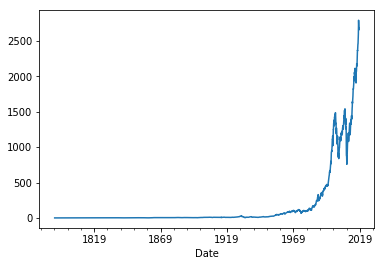

In [6]:
%matplotlib inline
f.resample('M').Close.mean().plot()

### NASDAQ Symbols

In [9]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8583 entries, A to ZYNE
Data columns (total 11 columns):
Nasdaq Traded       8583 non-null bool
Security Name       8583 non-null object
Listing Exchange    8583 non-null category
Market Category     8583 non-null object
ETF                 8583 non-null bool
Round Lot Size      8583 non-null float64
Test Issue          8583 non-null bool
Financial Status    3312 non-null category
CQS Symbol          5271 non-null object
NASDAQ Symbol       8583 non-null object
NextShares          8583 non-null bool
dtypes: bool(4), category(2), float64(1), object(4)
memory usage: 452.7+ KB


In [11]:
url = 'https://www.nasdaq.com/screening/companies-by-industry.aspx?exchange=NASDAQ'
res = pd.read_html(url)
len(res)

4

In [13]:
for r in res:
    print(r.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
0    1 non-null object
1    1 non-null object
dtypes: object(2)
memory usage: 96.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Name          100 non-null object
Symbol        50 non-null object
Market Cap    50 non-null object
ADR TSO       4 non-null float64
Country       50 non-null object
IPO Year      50 non-null object
Subsector     50 non-null object
dtypes: float64(1), object(6)
memory usage: 5.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
0    1 non-null object
dtypes: object(1)
memory usage: 88.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
0    1 non-null object
dtypes: object(1)
memory usage: 88.0+ bytes
None


### Tiingo

In [1]:
import pandas_datareader.data as pdr
import os
df = pdr.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1055 entries, (GOOG, 2014-03-27 00:00:00) to (GOOG, 2018-06-04 00:00:00)
Data columns (total 12 columns):
adjClose       1055 non-null float64
adjHigh        1055 non-null float64
adjLow         1055 non-null float64
adjOpen        1055 non-null float64
adjVolume      1055 non-null int64
close          1055 non-null float64
divCash        1055 non-null float64
high           1055 non-null float64
low            1055 non-null float64
open           1055 non-null float64
splitFactor    1055 non-null float64
volume         1055 non-null int64
dtypes: float64(10), int64(2)
memory usage: 107.1+ KB
